# Hacksembly

## Project - Extracting nutrition data from nutrition label images


Tesseract, an open source library for optical character recognition 

#### Self notes for installation

There is a docker image for tesseract
```docker pull ocrd/tesserocr```

However I'm going to install pytesseract on top of tensorflow-notebook as base.
```docker run -p 8888:8888 -v "${PWD}":/home/jovyan/work -e GRANT_SUDO=yes jupyter/tensorflow-notebook:tensorflow-2.4.1
docker exec -it [container] /bin/sh
sudo apt update
sudo apt install tesseract-ocr
sudo apt install libtesseract-dev
sudo pip install pytesseract
```

### lib documentation 
* https://pypi.org/project/pytesseract/
* pytesseract is a wrapper for tesseract OCR engine 
* https://github.com/tesseract-ocr/tesseract
* https://github.com/tesseract-ocr/tessdoc


In [33]:
#imports

from PIL import Image
import pytesseract 
import requests # for reading images from urls


### Preprocessing -  
* Binary Classification :TODO
    * Ideally, we would need a binary classifer first to identify those images with nutrition label.
    * Only those that filtered through the classifer would proceed for image to text processing
* up/down scale image size for better performance :TODO
* greyscale conversion done below needs to be part of preprocessing



image dimensions 344*626


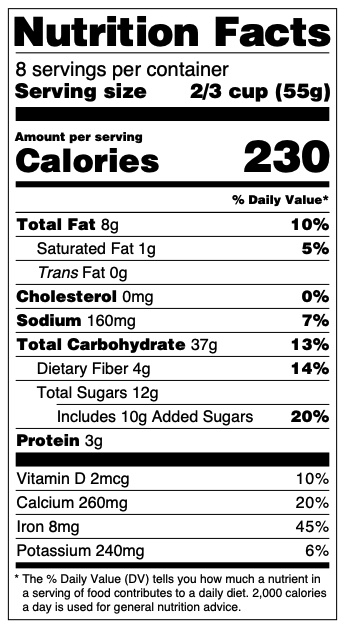

In [53]:
stdvertimg = Image.open("work/stdvert.jpg")
print("image dimensions {}*{}".format(stdvertimg.width,stdvertimg.height))

display(stdvertimg) #use Ipython's display instead of image.show()


In [12]:
text = pytesseract.image_to_string(stdvertimg) # extract text from image
print(text)

 

 

Nutrition Facts

8 servings per container
Serving size 2/3 cup (55g)
—

Calories _230

% Daily Value*

 

 

 

Total Fat 89 10%
Saturated Fat 1g 5%
Trans Fat 0g

Chol 1 omg 0%

Sodium 160mg 7%

Total Carbohydra' 13%
Dietary Fiber 4g 14%

Total Sugars 129
Includes 10g Added Sugars 20%
Protein 3g

Vitamin D 2meg 10%
Calcium 260mg 20%
Iron 8mg 45%
Potassium 240mg 6%

"The % Daily Value (DV) tells you how much a nutrient in
a serving of food contributes to a daily diet. 2,000 calories
a day is used for general nutrition advice.

 

 



### converting to greyscale image


In [13]:
print(pytesseract.image_to_string(stdvertimg.convert('L')))

 

 

Nutrition Facts

8 servings per container
Serving size 2/3 cup (55g)
——

Calories 230

% Daily Value*

 

 

 

Total Fat 89 10%
Saturated Fat 1g 5%
Trans Fat 0g

Chol 1 omg 0%

Sodium 160mg 7%

Total Carbohydrat 13%
Dietary Fiber 49 14%

Total Sugars 129
Includes 10g Added Sugars 20%
Protein 3g

Vitamin D 2meg 10%
Calcium 260mg 20%
Iron 8mg 45%
Potassium 240mg 6%

"The % Daily Value (DV) tells you how much a nutrient in
a serving of food contributes to a daily diet. 2,000 calories
a day is used for general nutrition advice.

 

 



In [22]:
text = pytesseract.image_to_data(stdvertimg)
print(type(text))
print(text)

<class 'str'>
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	344	626	-1	
2	1	1	0	0	0	8	7	329	3	-1	
3	1	1	1	0	0	8	7	329	3	-1	
4	1	1	1	1	0	8	7	329	3	-1	
5	1	1	1	1	1	8	7	329	3	95	 
2	1	2	0	0	0	7	8	3	612	-1	
3	1	2	1	0	0	7	8	3	612	-1	
4	1	2	1	1	0	7	8	3	612	-1	
5	1	2	1	1	1	7	8	3	612	95	 
2	1	3	0	0	0	14	16	316	31	-1	
3	1	3	1	0	0	14	16	316	31	-1	
4	1	3	1	1	0	14	16	316	31	-1	
5	1	3	1	1	1	14	16	184	31	96	Nutrition
5	1	3	1	1	2	216	17	114	30	95	Facts
2	1	4	0	0	0	15	61	315	60	-1	
3	1	4	1	0	0	15	61	315	60	-1	
4	1	4	1	1	0	16	61	213	19	-1	
5	1	4	1	1	1	16	62	10	14	96	8
5	1	4	1	1	2	33	61	73	19	96	servings
5	1	4	1	1	3	113	65	28	15	96	per
5	1	4	1	1	4	147	61	82	16	96	container
4	1	4	1	2	0	15	83	315	19	-1	
5	1	4	1	2	1	15	83	81	19	96	Serving
5	1	4	1	2	2	104	83	42	15	96	size
5	1	4	1	2	3	190	83	31	17	94	2/3
5	1	4	1	2	4	229	87	39	15	95	cup
5	1	4	1	2	5	276	83	54	19	92	(55g)
4	1	4	1	3	0	16	107	313	14	-1	
5	1	4	1	3	1	0	103	71	27	47	—
2	1	5	0	0	0	15	132	314	41	-1	

In [55]:
print(pytesseract.image_to_string(stdvertimg, config="-c tessedit_char_whitelist=01234567890ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz*%,/()\ ><"))

 

 

Nutrition Facts

8 servings per container
Serving size 2/3 cup (55g)
ee

Calories 230

% Daily Value*

 

 

 

Total Fat 89 10%
Saturated Fat 1g 5%
Trans Fat 0g

Chol 1 omg 0%

Sodium 160mg 7%

Total Carbohydrat 13%
Dietary Fiber 4g 14%

Total Sugars 129
Includes 10g Added Sugars 20%
Protein 3g

Vitamin D 2meg 10%
Calcium 260mg 20%
Iron 8mg 45%
Potassium 240mg 6%

* The % Daily Value (DV) tells you how much a nutrient in
a serving of food contributes to a daily diet, 2,000 calories
a day is used for general nutrition advice,

 

 



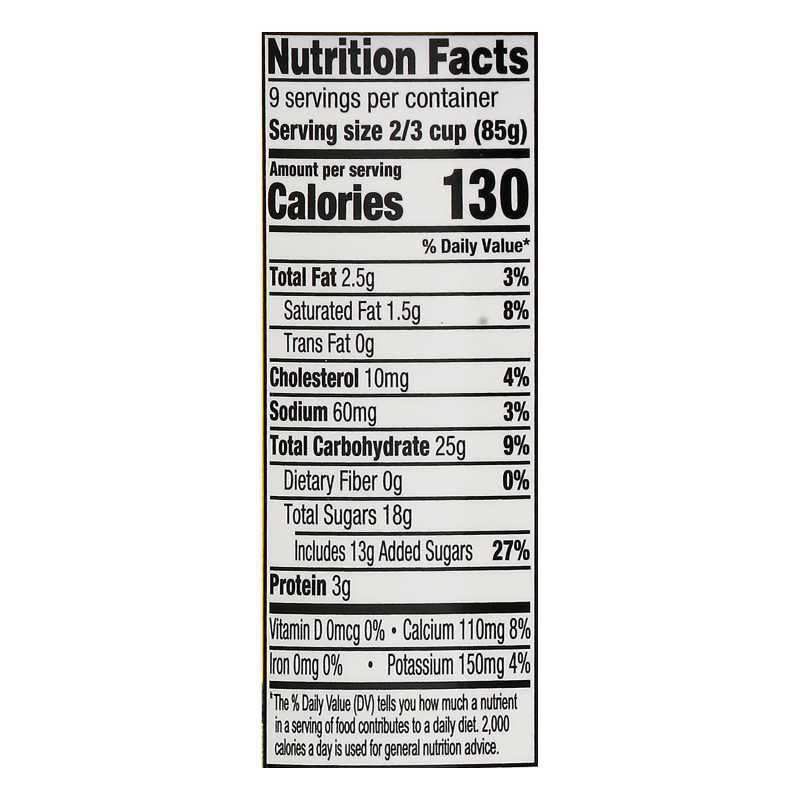

Saturated Fat 1.59

Trans Fat 0g
Cholesterol 10mg
Sodium 60mg
Total Carbohydrate 259

Dietary Fiber 0g

Total Sugars 18g

Includes 139 Added Sugars 27%

Protein 3g
Vitamin D Omg 0% + Calcium 110mg 8%
lronOmg 0% —» Potassium 150mg 4%

"The Daly Value (DV) tls you how much a nutrient
ina senig of food contbues toa daly ie. 2000
canis a days used for general nutrton advice,

 



In [44]:


#url = "https://i5.walmartimages.com/asr/97bcdb4b-a0fd-498e-95fe-3773548c16ab.b9bd1f6e34aacdd9efa41cf2cb1307f4.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF"
# https://www.foodcity.com/product/501/0007524320214 
url = "https://kvat-webassets.aisleahead.com/getMainImageSquare.php?upc=0007524320214&size=800&order=6"
img = Image.open(requests.get(url, stream=True).raw)
display(img)
print(pytesseract.image_to_string(img))

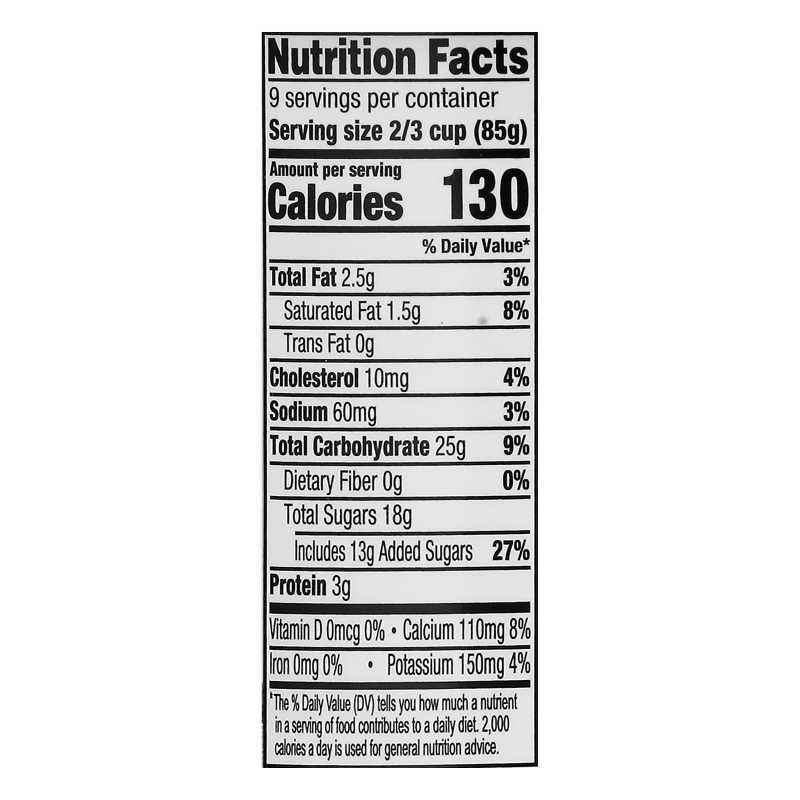

Nutrition Facts
9 servings per container
Serving size 2/3 cup (859)
Amount per serving
Calories 130
% Daily Value*
Total Fat 2.59 3%
Saturated Fat 1.59 8%
Trans Fat 0g
Cholesterol 10mg 4%
Sodium 60mg 3%
Total Carbohydrate 25g 9%
Dietary Fiber Og 0%
Total Sugars 18g
Includes 139 Added Sugars 27%
Protein 3g
Vitamin D Omeg 0% » Calcium 110mg 8%
lon Omg 0% ©» Potassium 150mg 4%

"The Daly Value (DV) tls you how much a nutent
ina senig of food contbues toa daly ie. 2000
canis a days used for general nutrion advice,

 



In [45]:
img = img.convert('L') #greyscale - seems to give better results 
display(img)
print(pytesseract.image_to_string(img))


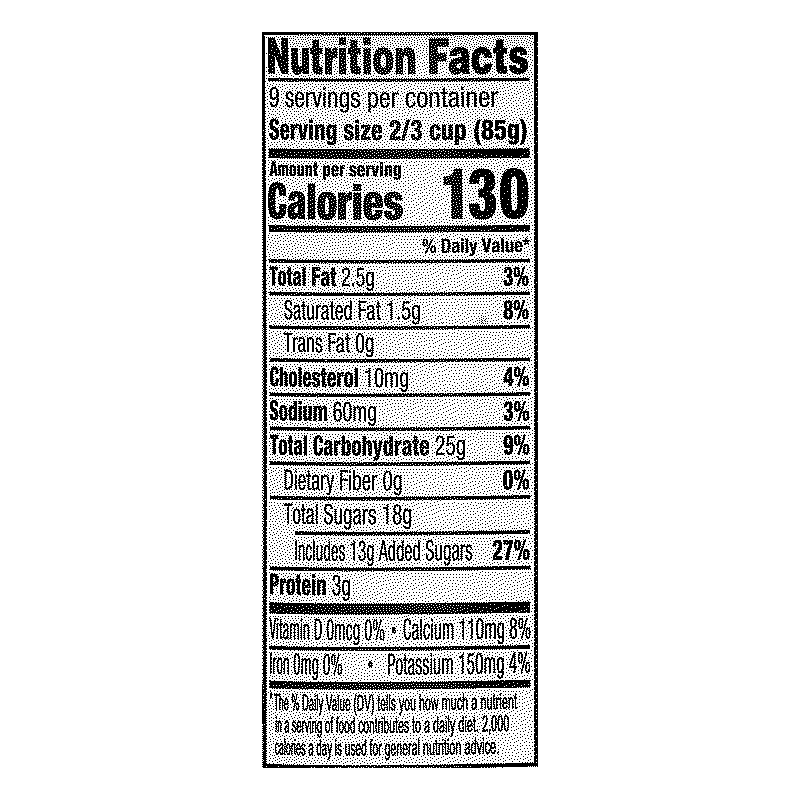

Nutrition Facts
9 servings per container
Serving size 2/3 cup (859)

Re RST EN |
‘Amount per serving
Calories 130
ae bally value
Total Fat? 50 ah
Salurated Fat 15g
Trans Fat Og

Cholesteral 10mg

Sodium 60m
Total Carbohydrate 259
Dietary Fiber Og
‘Total Suoars (80
tneodes 18a Adced Sugars 27%
Protein 3o

Vitamin D Ortog 0% + Calcium 110mg 8%
Fevdng 0% + Potassium 150mg 4%

"The Day Valu (OV ols you how much a hint
Peipianee bry eM
esa tay ied fv gral nut ave.

 



In [46]:
img = img.convert('1') #binarization,  bad result compared to 
display(img)
print(pytesseract.image_to_string(img))

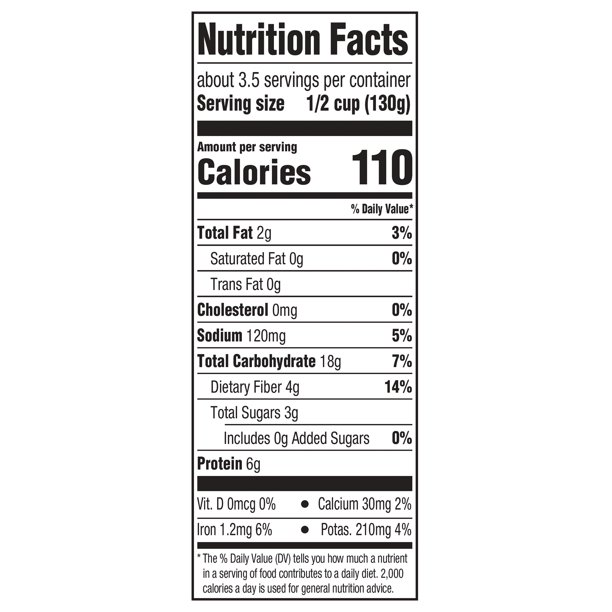

Nutrition Facts

about 3.5 servings per container

/Amount per serving
Calories 110
Dally Value
Total Fat 29 3%
Saturated Fat 0g 0%:
Trans Fat Og
Cholesterol Omg 0%
‘Sodium 120mg 5%
Total Carbohydrate 189 T%
Dietary Fiber 4g 14%

Total Sugars 39
Includes 0g Added Sugars 0%

[|
Vit. D Omcg 0% — © Calcium 30mg 2%
iron 1.2m 6% Potas, 210mg 4%
oe

“The % Daily Vaue (DV) tes you how mucha nutient
ina serving of food cotroutes toa daly cet.2,000
caries a days used for general nuttin advice

 

 



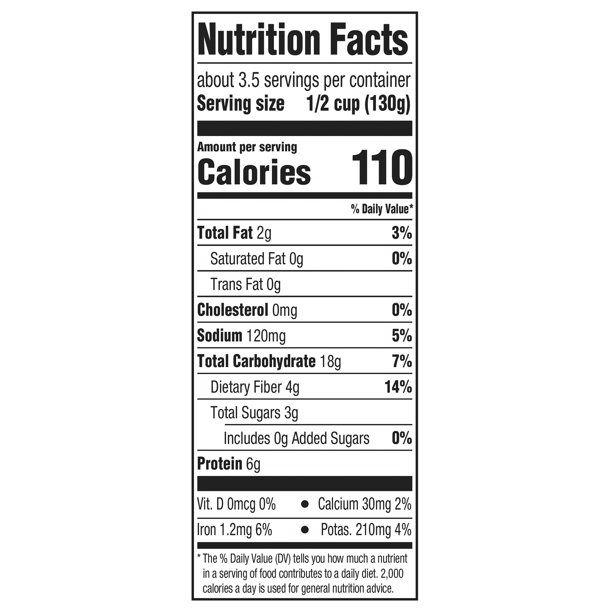

Nutrition Facts

about 3.5 servings per container

/Amount per serving
Calories 110
ally Value
Total Fat 2g 3%
Saturated Fat Og 0%:
Trans Fat Og
Cholesterol Omg 0%
‘Sodium 120mg 5%
Total Carbohydrate 189 T%
Dietary Fiber 4g 14%

Total Sugars 39
Includes 0g Added Sugars 0%:

Le
Vit. D Omcg 0% — © Calcium 30mg 2%
iron 1.2mg 6% Potas. 210mg 4%
SS

*The % Daily Vaue (DV) tes you how mucha nutient
ina serving of food cotroutes toa daly cet.2,000
calories a days used for general nuttin advice,

 

 



In [47]:
url = "https://i5.walmartimages.com/asr/97bcdb4b-a0fd-498e-95fe-3773548c16ab.b9bd1f6e34aacdd9efa41cf2cb1307f4.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF"
img = Image.open(requests.get(url, stream=True).raw)
display(img)
print(pytesseract.image_to_string(img))
img = img.convert('L')
display(img)
print(pytesseract.image_to_string(img))

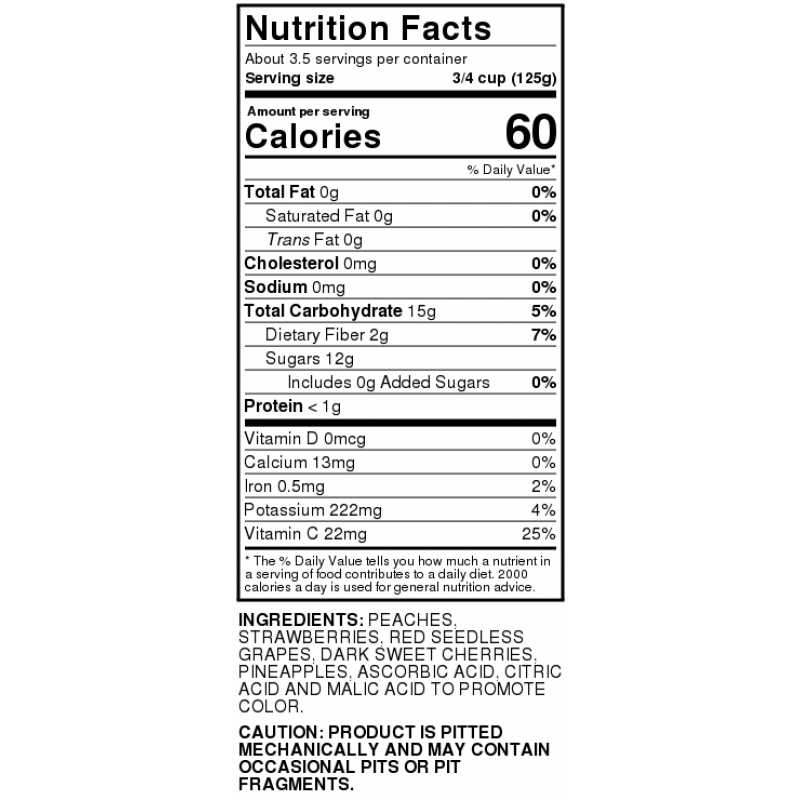

Nutrition Facts

About 3.5 servings per container
Serving size 3/4 cup (125g)
Sl

Amount per serving
Calories 60
% Daily Value*
Total Fat 0g
Saturated Fat 0g
Trans Fat 0g
Cholesterol Omg
Sodium Omg
Total Carbohydrate 15g 5%
Dietary Fiber 2g 7%
Sugars 12g
Includes Og Added Sugars 0%
Protein < 1g

Vitamin D Omeg 0%
Calcium 13mg 0%
iron 0.5mg 2%
Potassium 222mg 4%
Vitamin C 22mg 25%
* The % Daily Value tells you how much a nutrient in

a serving of food contributes to a daily diet. 2000
calories a day is used for general nutrition advice

 

INGREDIENTS: PEACHES.

STRAWBERRIES. RED SEEDLESS

GRAPES, DARK SWEET CHERRIES.

PINEAPPLES. ASCORBIC ACID. CITRIC

Soren MALIC ACID TO PROMOTE
LOR.

CAUTION: PRODUCT IS PITTED
MECHANICALLY AND MAY CONTAIN
OCCASIONAL PITS OR PIT
FRAGMENTS.



In [49]:
#https://www.foodcity.com/product/501/0003680030796
url = "https://kvat-webassets.aisleahead.com/getMainImageSquare.php?upc=0003680030796&size=800&order=4"
img = Image.open(requests.get(url, stream=True).raw)
img = img.convert('L')
display(img)
print(pytesseract.image_to_string(img))

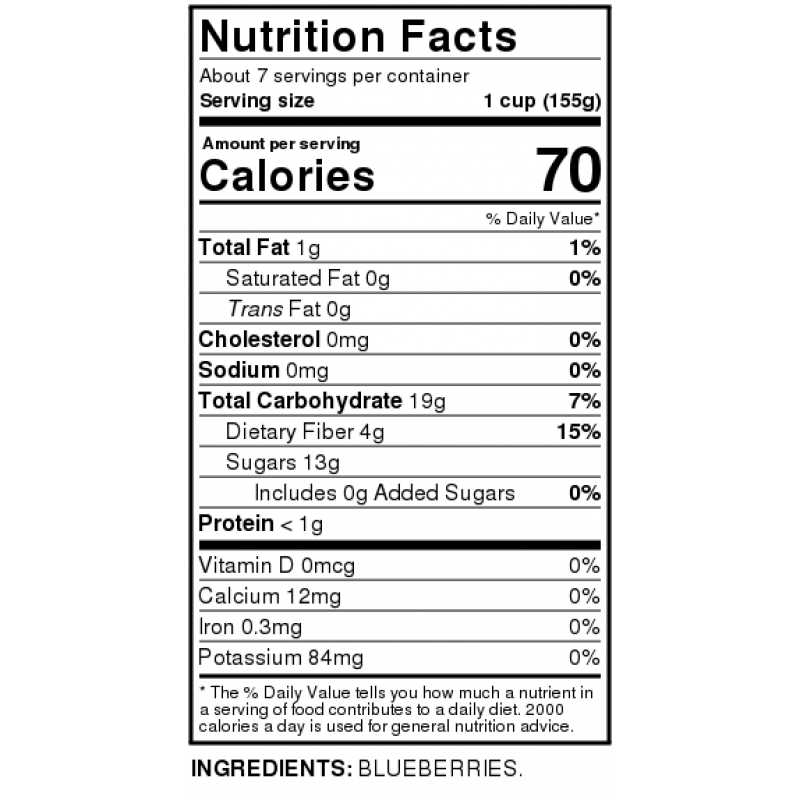

Nutrition Facts

About 7 servings per container
Serving size 1 cup (155g)
ST

Amount per serving
Calories 70
% Daily Value*

Total Fat 1g

Saturated Fat 0g

Trans Fat Og
Cholesterol Omg
Sodium Omg

Total Carbohydrate 19g 7%
Dietary Fiber 4g 15%

Sugars 13g
Includes 0g Added Sugars 0%
Protein < 1g

Vitamin D Omeg 0%
Calcium 12mg 0%
lron 0.3mg 0%
Potassium 84mg 0%
* The % Daily Value tells you how much a nutrient in

a serving of food contributes to a daily diet. 2000
calories a day is used for general nutrition advice.

INGREDIENTS: BLUEBERRIES.

 



In [50]:
#https://www.foodcity.com/product/501/0003680011942
url = "https://kvat-webassets.aisleahead.com/getMainImageSquare.php?upc=0003680011942&size=800&order=4"
img = Image.open(requests.get(url, stream=True).raw)
img = img.convert('L')
display(img)
print(pytesseract.image_to_string(img))

downloaded image


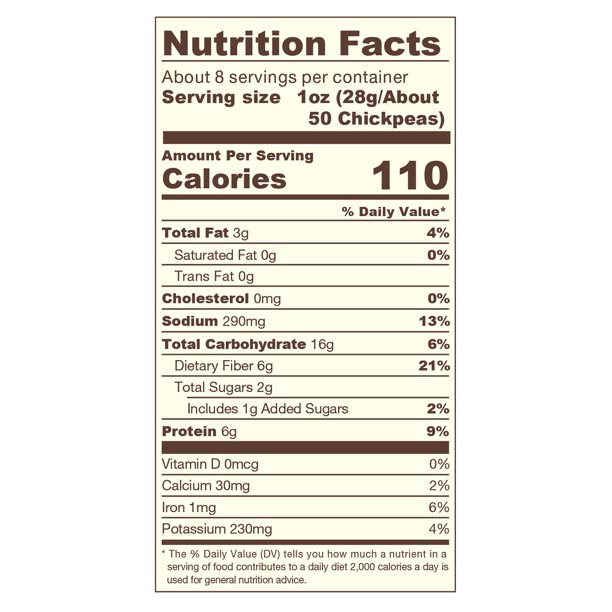

displaying greyscale image


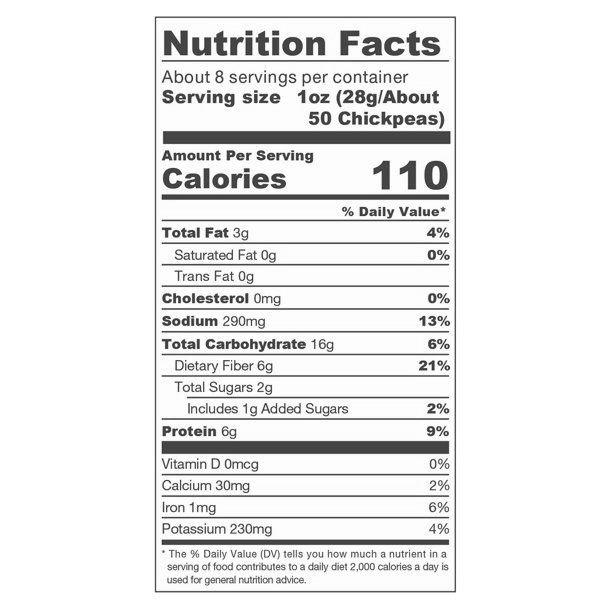

 

 

Nutrition Facts

About 8 servings per container

Serving size 10z (28g/About
50 Chickpeas)

 

Amount Per Sei

Calories

 

Total Fat 3
Saturated Fat Og
Trans Fat 0g

Cholesterol Omg 0%

 

 

 

‘Sodium 290mg 13%
Total Carbohydrate 169 6%
Dietary Fiber 6g 21%
Total Sugars 2g
Includes 19 Added Sugars 2%
tein 6g 9%
|
Vitamin D Omeg 0%
Calcium 30mg 2%
iron img 6%
Potassium 230mg 4%
The % Dally Value (OV) tells you how much a nutrient in a

 

serving offood contributes to a dally cit 2,000 calvies a day is
sed for general rtition ace,

 

 

displaying binary image


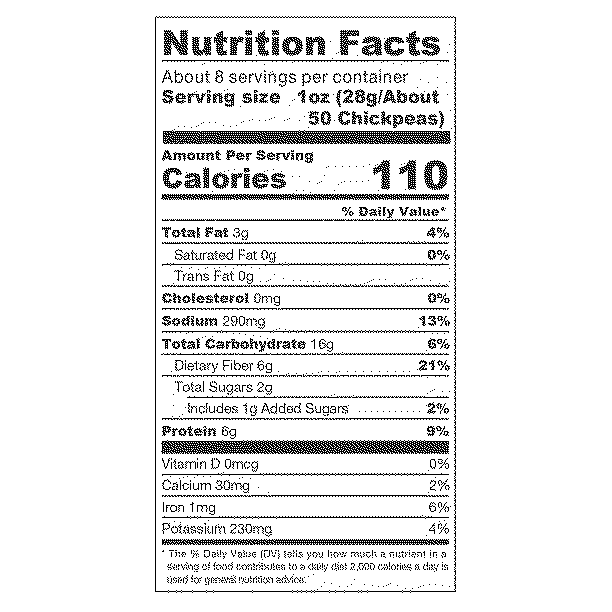

 

    
    
   
  

Nutrition Facts

About 8 servitigs per container
Serving size .don (28g/About

50.Chickpeas)
ee
Amount Ber Serving

Calories 410

% Bal

 

Yalue*

 

  

‘Total Fai 2%
Saturated Fat Og a%
Trans Fat 0

 

Bholesterol img %
Sodium 43%

8%
24%

 

 

Protein 59

Vitarnin D Omeg
Calcium 30mg
tron img
Poisssiutn 2300



In [59]:
#https://www.walmart.com/ip/Biena-8-oz-Rockin-Ranch-Roasted-Chickpea-Snacks/752518102
url = "https://i5.walmartimages.com/asr/4e9e32d4-d1d7-4f33-b01b-c1bd1b688def.5c7b14cf68e48253e7334d20ddc7aef3.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF"
img = Image.open(requests.get(url, stream=True).raw)
print("downloaded image")
display(img)
imgL = img.convert('L')
print("displaying greyscale image")
display(imgL)
print(pytesseract.image_to_string(imgL))

img1 = img.convert('1')
print("displaying binary image")
display(img1)
print(pytesseract.image_to_string(img1))


 greyscale image, before enhanceing


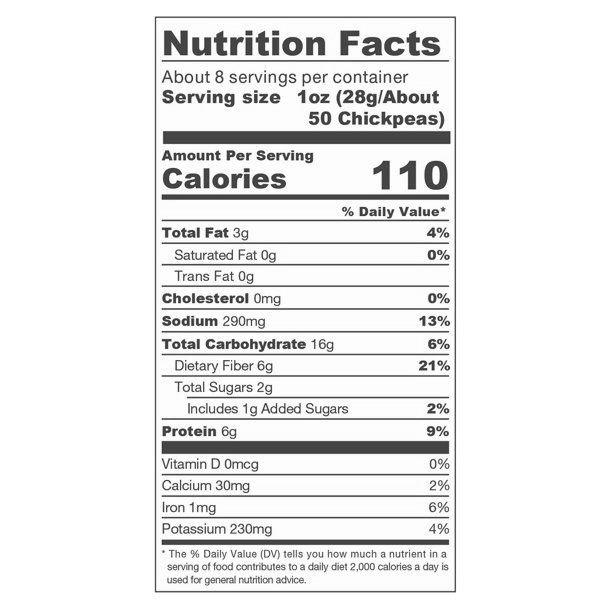

factor = 1


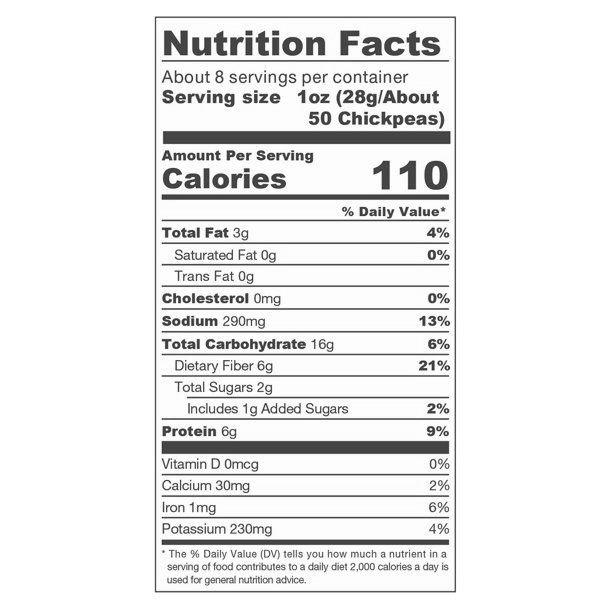

factor = 0.05


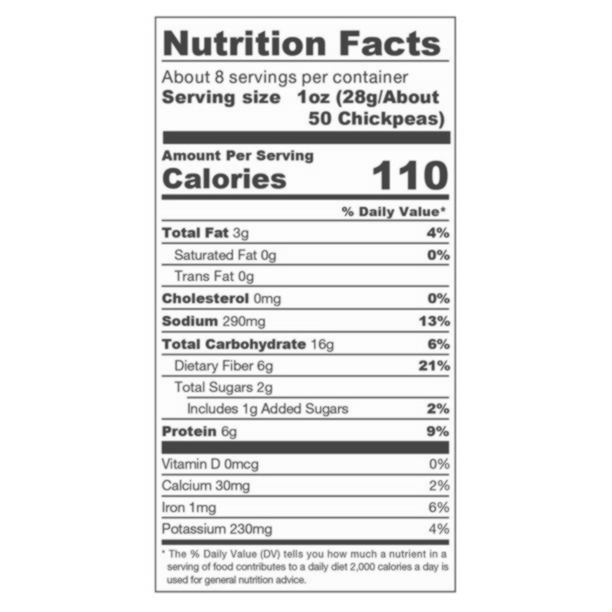

factor = 2


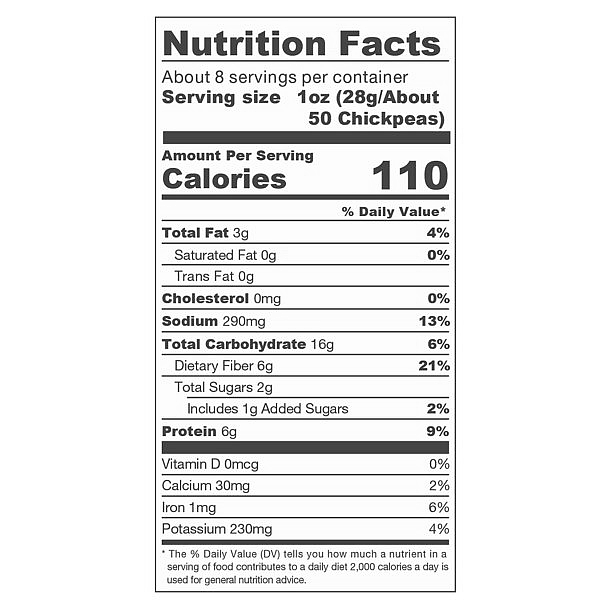

 

 

Nutrition Facts

About 8 servings per container
Serving size 1o0z (28g/About

50 Chickpeas)
ee

Amount Per Serving

Calories 110

  

 

 

% Daily Valu

Total Fat 39 4%
Saturated Fat 0g 0%
Trans Fat 0g

Cholesterol Omg 0%

  

‘Sodium 290mg 13%
Total Carbohydrate 16g 6%
Dietary Fiber 6g
Total Sugars 2g

 

 

includes 1g Added Sugars 2%
Protein 9%
a |
Vitamin D Omeg 0%
Calcium 30mg 2%
iron img 6%
Potassium 280mg 4%

 

"The % Daily Value (DV) tells you how much a nutrient in a
serving of food contbutes toa dally cit 2,000 calvies a day is
sed for general nuttin ace,

 

 



In [64]:
from PIL import ImageEnhance

print(" greyscale image, before enhanceing")
display(imgL)

enhancer = ImageEnhance.Sharpness(imgL)

factor = 1
enImgL = enhancer.enhance(factor)
print("factor = {}".format(factor))
display(enImgL)

factor = 0.05
enImgL = enhancer.enhance(factor)
print("factor = {}".format(factor))
display(enImgL)

factor = 2
enImgL = enhancer.enhance(factor)
print("factor = {}".format(factor))
display(enImgL)
print(pytesseract.image_to_string(enImgL))
